The critical lenght is 0.1105 m
We consider a system of lenght 0.111 m


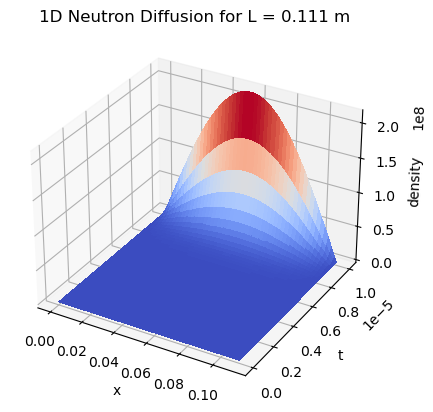

In [1]:
# We are studying the neutron diffusion in 1-dimension. This does not represent a physical situation. 
# We find the critical dimension (length) of the fissile material and then 
# we find the evolution of the neutron density as a function of time.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from matplotlib import cm

# Reading parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))
file1.close()
    
# Critical length 
L_critical_1d = np.pi*np.sqrt(mu/eta)
print('The critical lenght is', round(L_critical_1d, 4), 'm')
L_1d = round(L_critical_1d, 3) + 0.001
print('We consider a system of lenght', L_1d, 'm')
# Setting the maximum value of the time, otherwise we'll encounter an overflow
T_1d = 1e-5
# Initial condition for the neutron density at t=0
initial_condition_1d = lambda y: 16*y/L_1d*(1-y/L_1d)
integrand_Fourier_1d = lambda x: (2/L_1d) * initial_condition_1d(x) * np.sin(p * np.pi * x / L_1d) # 1d_integrand for fourier coefficients

# Fourier coefficients
tupla_coefficient_1d = []
for j in range(30): #We stop at n=30 because modes with n>30 give negligble contribution to the density
    p = j+1
    a = spi.quad(integrand_Fourier_1d, 0, L_1d)
    tupla_coefficient_1d.append(a)

# Tranforming a vector of tuples into a vector of floats a1_vec
float_coefficient_1d = np.array(np.ones(30))
for i in range(0,30):
    float_coefficient_1d[i] = tupla_coefficient_1d[i][0]

# Defining the neutron density as the more general solution of the diff. eq
def neutron_density_1D(t,x):
    neutron_density_1D = 0
    for i in range(0,30):
        p = i+1
        neutron_density_1D += float_coefficient_1d[i]*np.exp(eta*t - mu*(p**2)*(np.pi**2)*t/(L_1d**2))*np.sin(p*np.pi*x/L_1d)
    return neutron_density_1D

# Plotting the results
neutron_diffusion_1D_plot = plt.figure()
ax = plt.axes(projection = '3d')
t = np.linspace(T_1d, 0, 150)
x = np.linspace(0, L_1d, 150)
X, Y = np.meshgrid(t,x) #
Z = neutron_density_1D(X, Y)
surf = ax.plot_surface(Y,X , Z, cmap=cm.coolwarm,
               linewidth=0, antialiased=False)

ax.set_title('1D Neutron Diffusion for L = 0.111 m')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('density')
plt.show()